In [114]:
try:
    import graphviz
except ModuleNotFoundError as e:
    import pip
    pip.main(["install","graphviz"])
    import graphviz

## Simple Causal Graph

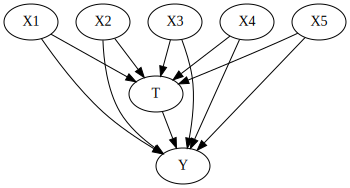

In [77]:
n_covariates = 5
dot = graphviz.Digraph("causal-graph",comment="A simple causal graph",filename="simple_graph.gv")
dot.node("T")
dot.node("Y")
for i in range(n_covariates):
    dot.node(f"X{i+1}")
    dot.edge(f"X{i+1}","T")
    dot.edge(f"X{i+1}","Y")
dot.edge("T","Y")
dot.edge_attr.update(arrowsize="1")
dot
# dot.view()


## CATE Graph

**Description:** The CATE is defined as the causal effect conditioned on subsets of units (for example, the individual causal effect on males vs females).  
Formally speaking, let $X_i \in \mathbb{R}$ be a subvector of the $n$ units by $m$ covariates matrix $X \in \mathbb{R}$. The CATE is defined as 
\begin{equation}
\tau(X_i) = E\left[ Y(1)-Y(0)|X_i \right]
\end{equation}
To illustrate this, we use [Plate notation](https://en.wikipedia.org/wiki/Plate_notation) which indicates that the same graph structure holds for arbitrary subsets $i$ in $N$

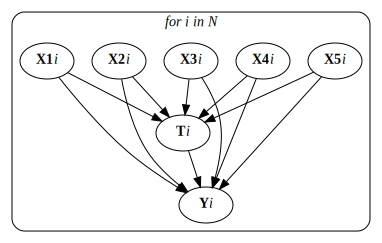

In [91]:
n_covariates = 5
node_label = lambda x : f"<<B>{x}</B><SUB><I>i</I></SUB>>" 
dot = graphviz.Digraph("causal-graph",comment="A causal graph with subsets",filename="cate_graph.gv")
with dot.subgraph(name="cluster_0") as c:
    c.attr(color="black",style="rounded")
    
    c.node("T",label=node_label("T"))
    c.node("Y",label=node_label("Y"))
    # hack to get indices in right order ( no idea why they are added in descending order otherwise...)
    
    for i in range(n_covariates-1,-1,-1):
        c.node(f"X{i+1}",label=node_label(f"X{i+1}"))        
        c.edge(f"X{i+1}","T")
        c.edge(f"X{i+1}","Y")
    c.edge("T","Y")
    c.edge_attr.update(arrowsize="1")
    c.attr(label="<<I>for i in N</I>>")
    
# c.view()
dot

## Instrumental Variable Graph

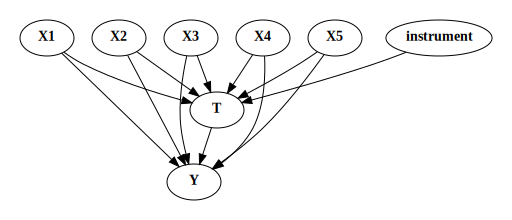

In [108]:
n_covariates = 5
node_label = lambda x : f"<<B>{x}</B>>" 
dot = graphviz.Digraph("iv-graph",comment="A causal graph with instrumental variables",filename="iv_graph.gv")
dot.attr(rank="same")
with dot.subgraph(name="cluster_0") as c:
    c.attr(color="white",rank="same")
    for i in range(n_covariates-1,-1,-1):
        c.node(f"X{i+1}",label=node_label(f"X{i+1}"))
        c.edge(f"X{i+1}","T")
        c.edge(f"X{i+1}","Y")
dot.node("T",label=node_label("T"))
dot.node("Y",label=node_label("Y"))
with dot.subgraph(name="cluster_instrument") as i:
    i.attr(color="white")
    i.node("I",label=node_label("instrument"))
dot.edge("I","T")
dot.edge("T","Y")
dot.edge_attr.update(arrowsize="1")
dot